# Polish Apartment Rental Market Analysis
Our data contain the apartment parameters and rental price in 15 greatest cities in Poland.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import os
os.getcwd()

'C:\\Users\\jakub\\anaconda_projects\\f52e659d-24ce-4fe5-bcf4-f70b9096d685'

## Loading the data from csv file

In [3]:
df = pd.read_csv("apartments_rent_pl_2024_06.csv")
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,727a1427f156535fc0531e59a27e7988,szczecin,blockOfFlats,34.0,1.0,2.0,3.0,NaN,53.394002,14.523988,...,0.481,condominium,NaN,premium,no,yes,no,no,yes,1700
1,a640ac5f62cce4d6806a7b7d73b5cd52,szczecin,apartmentBuilding,39.0,2.0,5.0,7.0,2022.0,53.404646,14.492033,...,0.546,condominium,brick,premium,yes,yes,yes,no,no,3400
2,40cb3c6185236a3e4f136641ab7099a4,szczecin,apartmentBuilding,47.0,2.0,4.0,12.0,2016.0,53.438231,14.562027,...,0.331,condominium,brick,premium,yes,yes,yes,yes,yes,2700
3,4f9fd13b91ba19534fc3db3fc93fa392,szczecin,blockOfFlats,28.0,1.0,4.0,4.0,2017.0,53.429461,14.552017,...,0.137,condominium,brick,premium,no,no,yes,no,no,2300
4,f14a3f2d0d1d1a8ec896e9587d2c9760,szczecin,blockOfFlats,46.7,2.0,3.0,3.0,1996.0,53.450800,14.556700,...,0.271,condominium,NaN,NaN,yes,yes,no,no,no,1850


In [ ]:
df['type'].isna().sum()

## Data cleaning
In first we want to find out how many missings we have in this dataset. As you can see on missings map, we have many missings in 5 columns, however i decided to remove two of them - *Building Material* and *Condition*. the remaining three columns are relevant to make analysis and i decided to stay with these and repace their missings.

In [4]:
print(df.isnull().sum())
print(df.isnull().any(axis=1).sum())
print(df.shape[0])

id                         0
city                       0
type                    1830
squareMeters               0
rooms                      0
floor                   1053
floorCount               155
buildYear               2249
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             4
postOfficeDistance         3
kindergartenDistance       3
restaurantDistance        16
collegeDistance          112
pharmacyDistance           7
ownership                  0
buildingMaterial        3505
condition               6329
hasParkingSpace            0
hasBalcony                 0
hasElevator              496
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64
7521
8849


In [ ]:
missing_mask = df.isnull()

sns.heatmap(missing_mask, cbar=False, yticklabels=False)
plt.show()

In [5]:
df = df.drop(columns=['buildingMaterial','condition'])

In [6]:
df['type'].isnull().sum()

np.int64(1830)

In [8]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        # 1. zastąp NaN specjalnym tokenem
        df_temp = df_encoded[col].fillna("__MISSING__")
        # 2. fit
        le.fit(df_temp)
        # 3. transform
        df_encoded[col] = le.transform(df_temp)
        label_encoders[col] = le

# --- Imputacja ---
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
df_imputed_array = imputer.fit_transform(df_encoded)
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

# --- Odwrócenie LabelEncoder ---
for col in label_encoders:
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col])
    # zamiana tokena z powrotem na np.nan
    df_imputed[col] = df_imputed[col].replace("__MISSING__", np.nan)

print(df_imputed.isna().sum())

id                         0
city                       0
type                    1830
squareMeters               0
rooms                      0
floor                      0
floorCount                 0
buildYear                  0
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance             0
clinicDistance             0
postOfficeDistance         0
kindergartenDistance       0
restaurantDistance         0
collegeDistance            0
pharmacyDistance           0
ownership                  0
hasParkingSpace            0
hasBalcony                 0
hasElevator              496
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64


After whole process we have  missings only in two columns: *type* and *hasElevator* in our data. In order to make uor data clean a haver decided to remove rows contains missings in data frame. It let us to make further analysis.

In [9]:
df_imputed = df_imputed.dropna(subset=['type', 'hasElevator'])

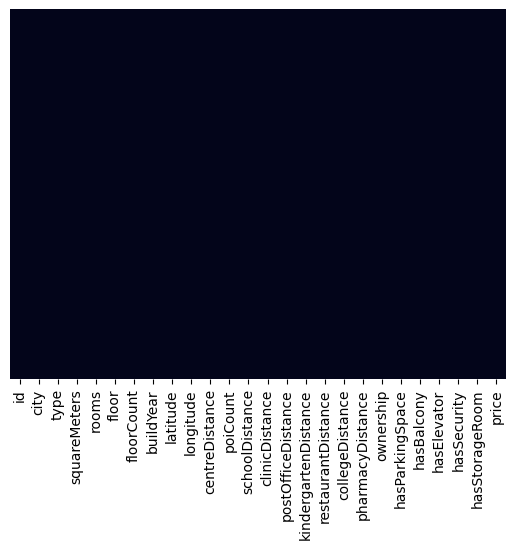

In [10]:
missing_mask1 = df_imputed.isnull()

sns.heatmap(missing_mask1, cbar=False, yticklabels=False)
plt.show()

In [12]:
df_imputed.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,727a1427f156535fc0531e59a27e7988,szczecin,blockOfFlats,34.0,1.0,2.0,3.0,1972.8,53.394002,14.523988,...,0.476,2.916,0.481,condominium,no,yes,no,no,yes,1700.0
1,a640ac5f62cce4d6806a7b7d73b5cd52,szczecin,apartmentBuilding,39.0,2.0,5.0,7.0,2022.0,53.404646,14.492033,...,0.377,3.119,0.546,condominium,yes,yes,yes,no,no,3400.0
2,40cb3c6185236a3e4f136641ab7099a4,szczecin,apartmentBuilding,47.0,2.0,4.0,12.0,2016.0,53.438231,14.562027,...,0.187,0.988,0.331,condominium,yes,yes,yes,yes,yes,2700.0
3,4f9fd13b91ba19534fc3db3fc93fa392,szczecin,blockOfFlats,28.0,1.0,4.0,4.0,2017.0,53.429461,14.552017,...,0.049,0.565,0.137,condominium,no,no,yes,no,no,2300.0
4,f14a3f2d0d1d1a8ec896e9587d2c9760,szczecin,blockOfFlats,46.7,2.0,3.0,3.0,1996.0,53.450800,14.556700,...,0.434,1.894,0.271,condominium,yes,yes,no,no,no,1850.0


In [37]:
df_imputed['buildYear']=df_imputed['buildYear'].astype(int)
df_imputed['rooms']=df_imputed['rooms'].astype(int)

In [38]:
df_ww= df_imputed[df_imputed['city'] != 'warszawa']
df_warsaw = df_imputed[df_imputed['city'] == 'warszawa']

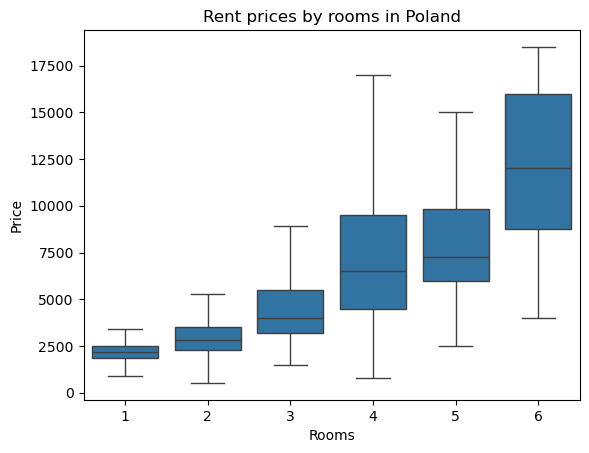

In [39]:
sns.boxplot(
    df_imputed,
    x= 'rooms',
    y= 'price',
    showfliers=False
)
plt.title("Rent prices by rooms in Poland")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

**Summary statistics of rental apartments in Poland (excluding Warsaw)**

In [17]:
tabela = df_ww[['price', 'squareMeters']].describe().T
tabela = tabela[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
tabela = tabela.round({'count': 0, 'mean': 2, 'std': 2,
                       'min': 2, '25%': 2, '50%': 2, '75%': 2, 'max': 2})
tabela


,count,mean,std,min,25%,50%,75%,max
price,4178.0,2898.35,1138.57,522.0,2192.25,2700.0,3300.00,9500.00
squareMeters,4178.0,49.94,17.57,25.0,38.00,47.0,57.04,148.97


**Summary statistics of rental apartments in Warsaw**

In [18]:
tabela1 = df_warsaw[['price', 'squareMeters']].describe().T
tabela1 = tabela1[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
tabela1 = tabela1.round({'count': 0, 'mean': 2, 'std': 2,
                       'min': 2, '25%': 2, '50%': 2, '75%': 2, 'max': 2})
tabela1

,count,mean,std,min,25%,50%,75%,max
price,2595.0,5194.62,3073.16,2200.0,3200.0,4000.0,6000.00,19500.0
squareMeters,2595.0,61.98,27.40,25.0,42.0,53.9,74.07,150.0


## Visualization of data 

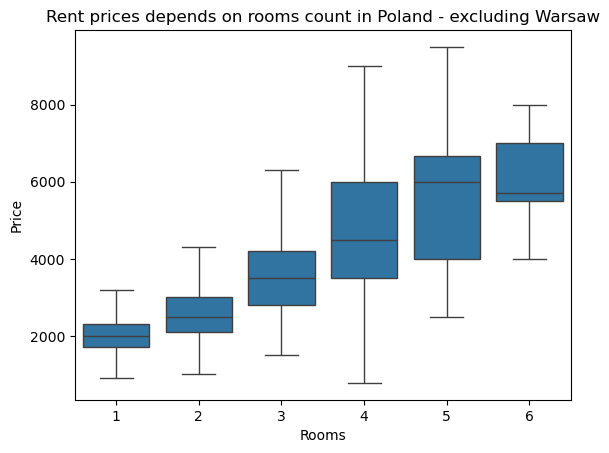

In [40]:
sns.boxplot(
    df_ww,
    x= 'rooms',
    y= 'price',
    showfliers=False
)
plt.title("Rent prices depends on rooms count in Poland - excluding Warsaw")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

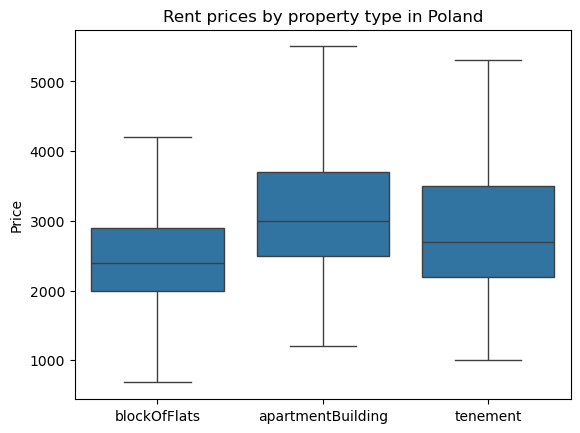

In [41]:
sns.boxplot(
    data=df_ww,
    x='type',
    y='price',
    showfliers=False
)
plt.title("Rent prices by property type in Poland")
plt.xlabel("")
plt.ylabel("Price")
plt.show()

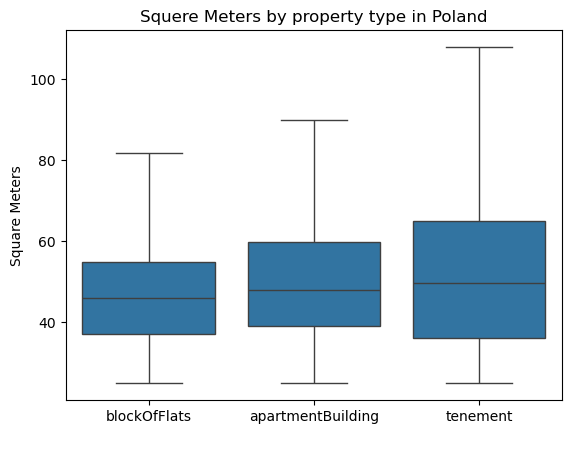

In [42]:
sns.boxplot(
    df_ww,
    x='type',
    y='squareMeters',
    showfliers=False
)
plt.title("Squere Meters by property type in Poland")
plt.xlabel(" ")
plt.ylabel("Square Meters")
plt.xticks
plt.show()

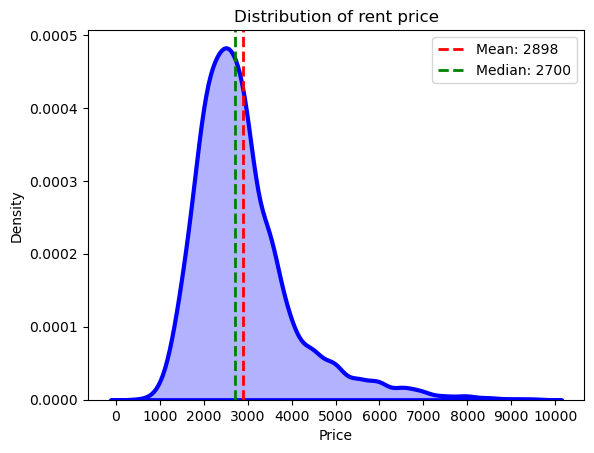

In [24]:
mean_price = df_ww['price'].mean()
median_price = df_ww['price'].median()

sns.kdeplot(df_ww['price'], color="blue", linewidth=3, fill=True, alpha=0.3)
plt.title("Distribution of rent price")
plt.xticks([0, 1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.xlabel("Price")
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: {median_price:.0f}')
plt.legend()
plt.show()

**Correlation Heatmap**

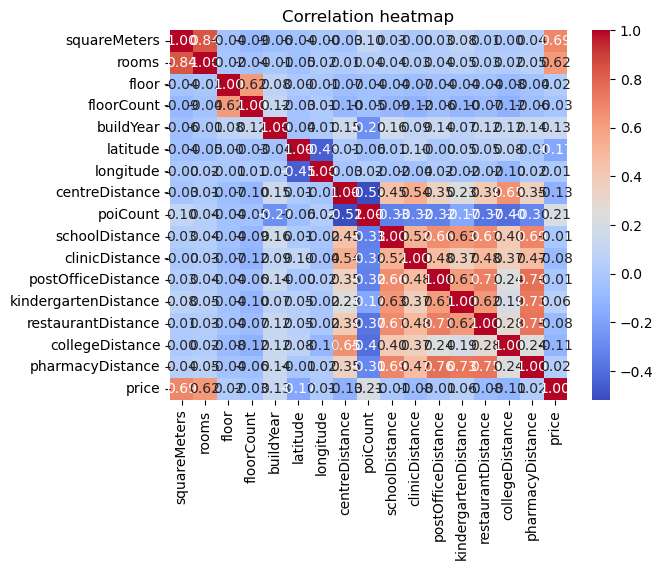

In [25]:
corr_matrix = df_ww.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

## Building Linear Regression Model based on Rental Apartments data in Poland excluding Warsaw

In [26]:
X = df_ww[['squareMeters','rooms','buildYear','centreDistance','floor','centreDistance','poiCount']]  # cechy (liczba pokoi, powierzchnia)
y = df_ww['price']        

In [27]:
data = pd.concat([X, y], axis=1).dropna()
X = data[['squareMeters','rooms','buildYear','centreDistance','floor','centreDistance','poiCount']]
y = data['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Współczynniki regresji:", model.coef_)
print("Wyraz wolny (intercept):", model.intercept_)
print("R² score:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Współczynniki regresji: [ 35.45449616 230.32207272   9.28423489  -5.56421931  -5.56421931
  19.67925455  -5.56421931  -5.56421931   7.67736701]
Wyraz wolny (intercept): -18127.209312222552
R² score: 0.5605288581205807
RMSE: 765.7354444825934


In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("R² train:", r2_score(y_train, y_train_pred))
print("R² test:", r2_score(y_test, y_test_pred))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R² train: 0.5496911565682256
R² test: 0.5605288581205807
RMSE test: 765.7354444825934


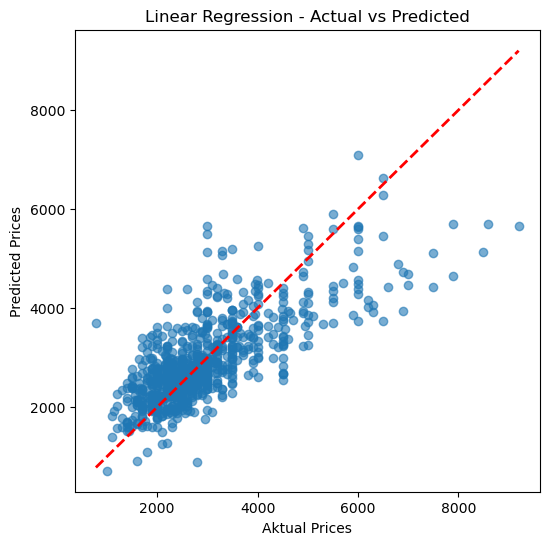

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Aktual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()

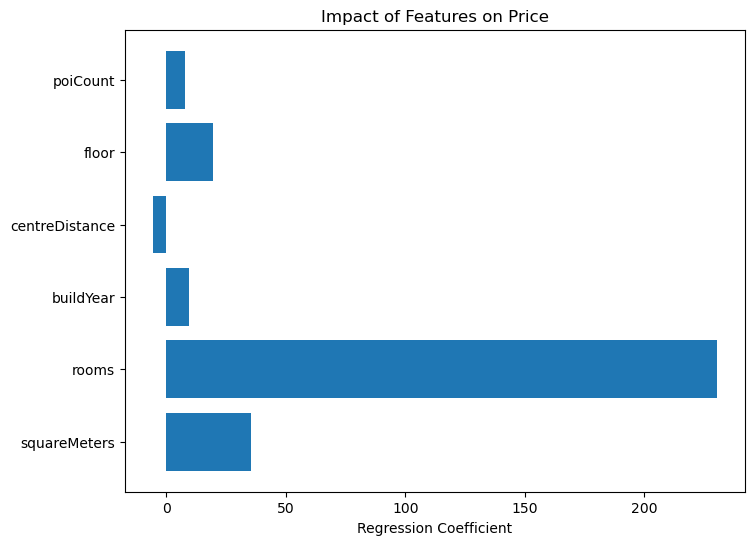

In [32]:
coef = model.coef_
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(features, coef)
plt.xlabel("Regression Coefficient")
plt.title("Impact of Features on Price")
plt.show()

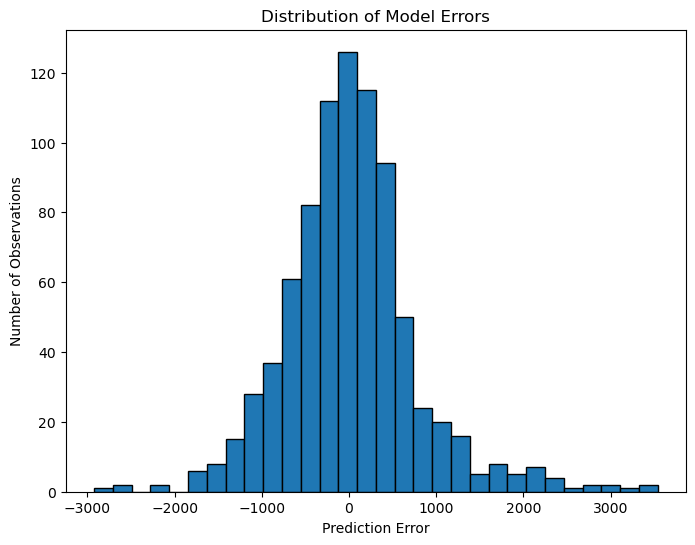

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Number of Observations")
plt.title("Distribution of Model Errors")
plt.show()

In [35]:
df_imputed.to_csv("df_imputed.csv", index=False)